In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_up_BCH2.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,up,2018-12-20 17:00:02,BitcoinCash_ES,0,1,#BitcoinCash #Kraken #BCHEUR,Cotización del Bitcoin Cash: 170 40.€ | +4.67%...
1,BCH,up,2018-12-20 17:00:17,coinstats,0,2,#BitcoinCash #BCH,BitcoinCash - BCH Price: $196.24 Change in 1h:...
2,BCH,up,2018-12-20 17:00:19,CryptoGulp,0,1,NaN,Top 5 Cryptocurrencies - Current Prices $BTC: ...
3,BCH,up,2018-12-20 17:00:19,TrackThatCrypto,0,0,#crypto #bitcoin #bitcoin #ethereum #litecoin ...,TOP-12 most-mentioned #crypto this hour: 1. #b...
4,BCH,up,2018-12-20 17:00:24,bitrus_exchange,0,1,#Bitrus #Bitruser #BitcoinPrice #CryptoNews,"December 20th, 2018 Price (USD): - Bitcoin $4,..."
...,...,...,...,...,...,...,...,...
436,BCH,up,2018-12-20 22:51:40,TickerTop,0,1,NaN,1: Bitcoin average price is $4102.5604575 (1.7...
437,BCH,up,2018-12-20 22:52:42,coinpricenow,0,1,#BTC #BTC #BCH #ETH #XRP #Bitcoin #Bitcoin #Et...,1 Bitcoin ( #BTC ) Dollar: 4065.51$1 Bitcoin C...
438,BCH,up,2018-12-20 22:56:35,mattmalcrypto,0,1,NaN,$700 is grand and all but with a 24k investmen...
439,BCH,up,2018-12-20 22:57:26,doug_robin,0,2,#btc #btc #bitcoin #bitcoin #bitcoinnews #eth ...,I don't think so there is Google Adsense Alter...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [cotización, del, bitcoin, cash, :, 170, 40.€,...
1      [bitcoincash, bch, price, :, $, 196.24, change...
2      [top, 5, cryptocurrencies, current, prices, $,...
3      [top, 12, most, mentioned, crypto, this, hour,...
4      [december, 20th, ,, 2018, price, (, usd, ), :,...
                             ...                        
436    [1, :, bitcoin, average, price, is, $, 4102.56...
437    [1, bitcoin, (, btc, ), dollar, :, 4065.51, $,...
438    [$, 700, is, grand, and, all, but, with, a, 24...
439    [i, do, n't, think, so, there, is, google, ads...
440    [coinbase, ’, s, new, coin, to, coin, model, :...
Name: text, Length: 441, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [cotización, del, bitcoin, cash, :, |, %, |, k...
1      [bitcoincash, bch, price, :, $, change, :, %, ...
2      [top, cryptocurrencies, current, prices, $, bt...
3      [top, mentioned, crypto, hour, :, bitcoin, eth...
4      [december, ,, price, (, usd, ), :, bitcoin, $,...
                             ...                        
436    [:, bitcoin, average, price, $, (, %, ), :, xr...
437    [bitcoin, (, btc, ), dollar, :, $, bitcoin, ca...
438    [$, grand, investment, bought, bitcoin, cash, ...
439    [think, google, adsense, alternative, btc, bit...
440    [’, new, coin, coin, model, :, better, direct,...
Name: text, Length: 441, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

1071

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1071


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

1071

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

1071

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

164.47805462714118

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.2182359009506195

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.027952992175473878

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
189,"[0.00091926398454234, 0.0014854862820357084, -...",face,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.288811,0.003351,1.285460,NaN
533,"[-0.003801716724410653, -0.000553554855287075,...",cold,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.328796,0.002234,1.326562,NaN
484,"[0.0019373957766219974, 0.0034958606120198965,...",airbitclub,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.344102,0.002234,1.341868,NaN
48,"[0.005077509209513664, 0.004864722490310669, -...",momentum,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.376441,0.004468,1.371973,NaN
682,"[-0.001338214729912579, 0.0049149454571306705,...",next,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.382936,0.002234,1.380702,NaN
936,"[-0.0026784599758684635, -0.003368668723851442...",bitconnect,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.421992,0.001117,1.420875,NaN
933,"[0.004829337354749441, -0.0010409890674054623,...",potrivit,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.434283,0.001117,1.433166,NaN
684,"[0.005393221043050289, -0.0033461872953921556,...",tradeio,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.437705,0.001117,1.436588,NaN
985,"[-0.0016383513575419784, 0.0033175870776176453...",gumtree,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.438284,0.001117,1.437167,NaN
352,"[0.005335733760148287, 0.0007299696444533765, ...",platinum,0,"[0.00018788541, 0.00015011545, -0.0016752718, ...",0.452235,0.002234,1.450001,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
276,"[-0.001438578823581338, -0.0044343858025968075...",euro,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.446582,0.002234,1.444348,NaN
545,"[-0.0016525548417121172, 0.0010233332868665457...",subindo,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.449533,0.002234,1.447299,NaN
573,"[-0.0015547648072242737, 0.001873399829491973,...",entrepreneur,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.456682,0.002234,1.454448,NaN
848,"[-0.001975120510905981, -0.000723161909263581,...",instaethereum,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.468687,0.002234,1.466453,NaN
788,"[-0.0013084511738270521, 0.0013089098501950502...",marketcap,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.468532,0.001117,1.467415,NaN
594,"[0.004960391670465469, 0.001415278878994286, -...",btceur,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.479135,0.002234,1.476901,NaN
598,"[0.0008004337432794273, -0.0023867960553616285...",otras,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.489887,0.001117,1.488770,NaN
254,"[0.0035060434602200985, 0.00493962224572897, -...",precios,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.497135,0.001117,1.496018,NaN
673,"[-0.0022029366809874773, 0.0003312616900075227...",utm_medium=auto,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.498271,0.002234,1.496037,NaN
916,"[0.005148688796907663, -0.00404821801930666, -...",instacryptocurrency,1,"[0.00015304683, 6.840177e-05, -0.002101798, 0....",0.501386,0.001117,1.500269,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
843,"[-0.0006339086103253067, 0.00525651965290308, ...",digital,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.300845,0.002234,1.298611,NaN
226,"[0.006307211238890886, -0.0017297397134825587,...",check,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.314236,0.003351,1.310885,NaN
1015,"[0.0009368391474708915, 0.00026878685457631946...",dapps,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.365842,0.001117,1.364725,NaN
304,"[0.0016759418649598956, 0.00405236566439271, -...",smartcash,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.430333,0.003351,1.426982,NaN
1025,"[-0.0007178057567216456, -0.001725668553262949...",huge,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.430695,0.001117,1.429578,NaN
496,"[0.004930085502564907, 0.00404368108138442, -0...",support,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.446010,0.002234,1.443776,NaN
1014,"[0.0021807276643812656, 0.0009623382356949151,...",publickey,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.459465,0.001117,1.458349,NaN
692,"[0.004618806764483452, -0.004364073276519775, ...",btcusd,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.471550,0.002234,1.469316,NaN
895,"[0.005004364065825939, 0.0031581877265125513, ...",merit,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.483544,0.001117,1.482427,NaN
409,"[-0.0022806597407907248, -0.000350383779732510...",intertops,2,"[0.00057263917, 0.0012268892, -0.0015677416, 0...",0.488540,0.002234,1.486306,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[0.022262761369347572, 0.009196460247039795, -...",bitcoin,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.003113,0.753929,0.249184,NaN
2,"[0.019787974655628204, 0.0037694110069423914, ...",cash,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.003750,0.430019,0.573731,NaN
4,"[0.020592503249645233, 0.001734800054691732, -...",bitcoincash,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.005142,0.206632,0.798510,NaN
12,"[0.014889966696500778, 0.0028882690239697695, ...",ethereum,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.010988,0.174241,0.836746,NaN
6,"[0.0052204132080078125, 0.0063736396841704845,...",price,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.016413,0.148552,0.867861,NaN
15,"[0.00576223898679018, 0.0070818751119077206, -...",hour,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.023128,0.153020,0.870108,NaN
14,"[0.012970971874892712, 0.005699911620467901, -...",crypto,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.006551,0.131798,0.874753,NaN
16,"[0.010583633556962013, 0.006142403464764357, -...",litecoin,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.010335,0.103875,0.906461,NaN
781,"[0.010539506562054157, -0.001219667261466384, ...",sync,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.020787,0.106109,0.914679,NaN
780,"[0.004721234552562237, 0.0007030754932202399, ...",bchd,3,"[0.0022290251, 0.00046010842, -0.0092260195, 0...",0.024381,0.106109,0.918272,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

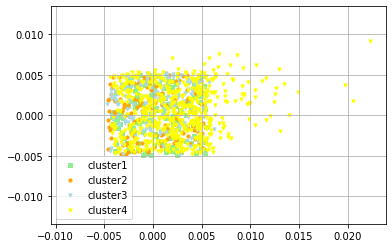

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 기타

158

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 비즈

147

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기술

181

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 투자

585

In [66]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [67]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 13 # 기타

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 7 # 비즈

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 9 # 기술

In [71]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 11 # 투자

In [72]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [73]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [74]:
kmeans.inertia_

1.0273619890213013

In [75]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 3 3 ... 2 2 2]


In [76]:
cluster_values= list(model.wv.vocab)

In [77]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.0273621082305908


In [78]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [79]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.2611598


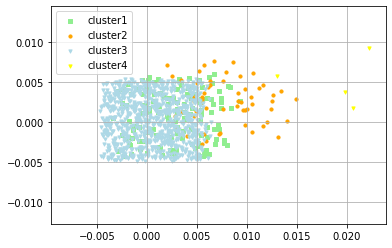

In [80]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [81]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [82]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [83]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [84]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [85]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [86]:
import scipy.spatial.distance as dist

In [87]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [88]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
368,"[0.0020916396751999855, 0.0006587273092009127,...",average,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.047261,0.033508,1.013753,NaN
638,"[0.006761831231415272, -0.0009351254557259381,...",btctn,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.029047,0.010052,1.018994,NaN
308,"[0.005968703888356686, -0.0018765311688184738,...",ビットコイン,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.029053,0.010052,1.019001,NaN
190,"[-0.001935829408466816, -0.001940789632499218,...",alerta,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.033062,0.013403,1.019659,NaN
209,"[0.003984691109508276, 0.0034132003784179688, ...",drop,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.029732,0.010052,1.019680,NaN
183,"[0.0071648843586444855, -0.0008960820268839598...",rise,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.027551,0.007819,1.019732,NaN
205,"[0.0007014570874162018, 0.003474473487585783, ...",break,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.028046,0.007819,1.020227,NaN
730,"[0.00018607208039611578, 0.005590780172497034,...",move,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.028708,0.007819,1.020890,NaN
191,"[-0.000426410319050774, 0.003432507859542966, ...",sube,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.032140,0.011169,1.020971,NaN
203,"[0.0022412941325455904, 0.0030097835697233677,...",developer,0,"[0.0027556461, 0.0005360462, -0.012261081, 0.0...",0.030048,0.008935,1.021112,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
15,"[0.00576223898679018, 0.0070818751119077206, -...",hour,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.031749,0.153020,0.878729,NaN
6,"[0.0052204132080078125, 0.0063736396841704845,...",price,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.037542,0.148552,0.888990,NaN
12,"[0.014889966696500778, 0.0028882690239697695, ...",ethereum,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.073223,0.174241,0.898982,NaN
781,"[0.010539506562054157, -0.001219667261466384, ...",sync,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.033147,0.106109,0.927039,NaN
780,"[0.004721234552562237, 0.0007030754932202399, ...",bchd,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.034734,0.106109,0.928625,NaN
626,"[0.009857635013759136, 0.0014809996355324984, ...",fast,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.033394,0.101641,0.931753,NaN
782,"[0.0097833052277565, 0.004072234965860844, -0....",mode,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.039468,0.097173,0.942295,NaN
424,"[0.006098954007029533, 0.0043603526428341866, ...",node,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.051469,0.100524,0.950945,NaN
24,"[0.0046893940307199955, 0.0030762592796236277,...",blockchain,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.031365,0.059197,0.972167,NaN
22,"[0.00765229994431138, 0.0051477025263011456, -...",cryptocurrency,1,"[0.007893888, 0.0025402568, -0.034753732, 0.02...",0.062069,0.082653,0.979416,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
11,"[0.0020040059462189674, 0.004127567168325186, ...",current,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.028943,0.013403,1.015540,NaN
736,"[0.0018561652395874262, 0.002875674981623888, ...",sxdt,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.025305,0.004468,1.020837,NaN
422,"[0.004423950798809528, -0.0006751155015081167,...",transaction,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.027942,0.006702,1.021240,NaN
9,"[0.0005031055770814419, -0.0031318224500864744...",rank,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.028035,0.006702,1.021334,NaN
220,"[-0.0013689304469153285, 0.0017401223303750157...",major,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.029342,0.006702,1.022640,NaN
160,"[-0.002373018767684698, 0.0038138481322675943,...",split,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.026161,0.003351,1.022810,NaN
558,"[0.0017279715975746512, -0.002082222606986761,...",instacrypto,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.025761,0.002234,1.023528,NaN
824,"[-0.003754429053515196, 0.003566614119336009, ...",tokensnet,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.028059,0.004468,1.023591,NaN
118,"[-0.0016315350076183677, 0.004761426709592342,...",receive,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.028060,0.004468,1.023592,NaN
419,"[0.0059159002266824245, -0.0012353806523606181...",stockmarket,2,"[0.0006401359, 0.0003282678, -0.0025881843, 0....",0.025929,0.002234,1.023695,NaN


In [92]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[0.022262761369347572, 0.009196460247039795, -...",bitcoin,3,"[0.018903552, 0.005100146, -0.08602464, 0.0534...",0.126387,0.753929,0.372458,NaN
2,"[0.019787974655628204, 0.0037694110069423914, ...",cash,3,"[0.018903552, 0.005100146, -0.08602464, 0.0534...",0.023903,0.430019,0.593884,NaN
4,"[0.020592503249645233, 0.001734800054691732, -...",bitcoincash,3,"[0.018903552, 0.005100146, -0.08602464, 0.0534...",0.037828,0.206632,0.831196,NaN
14,"[0.012970971874892712, 0.005699911620467901, -...",crypto,3,"[0.018903552, 0.005100146, -0.08602464, 0.0534...",0.100246,0.131798,0.968448,NaN


In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 거래소

136

In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 거래소

57

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 비즈

874

In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 투자

4

In [97]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 12 # 거래소

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [102]:
temp_cluster_result1['Silhouette'] = 0.2611598
temp_cluster_result['Silhouette'] = 0.2611598
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [103]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BCH2_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_up_BCH2_cosine")